<a href="https://colab.research.google.com/github/gadgesnehu/Hello-World/blob/main/Pancard_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset  
  -Images   
    - Image1.jpg  
    - Image2.jpg  
    .
    .
    .

  -Labels
   - Image1.txt
   - Image2.txt
   .
   .
   .

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_dir = '/content/drive/MyDrive/pan dataset'

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 9758, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 9758 (delta 35), reused 32 (delta 28), pack-reused 9713
Receiving objects: 100% (9758/9758), 10.11 MiB | 2.57 MiB/s, done.
Resolving deltas: 100% (6774/6774), done.


In [ ]:
pip install -r /content/yolov5/requirements.txt


     |████████████████████████████████| 596 kB 12.5 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
%%writefile train_config.yaml
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 4  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

Writing train_config.yaml


In [ ]:
%%writefile data_config.yaml

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
train: '/content/drive/MyDrive/pan dataset/images/train'  # train images (relative to 'path') 128 images
val: '/content/drive/MyDrive/pan dataset/images/test'  # val images (relative to 'path') 128 images

# Classes
nc: 4  # number of classes
names: ['pan number','name','fathers name','dob']  # class names

Overwriting data_config.yaml


In [ ]:
!python /content/yolov5/train.py --img 512 --batch 32 --epochs 100 --data /content/data_config.yaml --cfg train_config.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=train_config.yaml, data=/content/data_config.yaml, hyp=yolov5/data/hyps/hyp.scratch.yaml, epochs=100, batch_size=32, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamm

In [ ]:
import cv2

In [ ]:
image = cv2.imread('/content/drive/MyDrive/f7704dfc-8217-436d-843a-d85ef6054b29.jpg')

In [ ]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', 'yolov5/runs/train/exp4/weights/best.pt')  # or yolov5m, yolov5l, yolov5x, custom

# Inference
results = model(image, 500)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.
results.save()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2021-10-26 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 



requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Model Summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
image 1/1: 1179x1920 1 pan number, 1 name
Speed: 3.6ms pre-process, 27.0ms inference, 2.0ms NMS per image at shape (1, 3, 320, 512)
Saved 1 image to runs/detect/exp


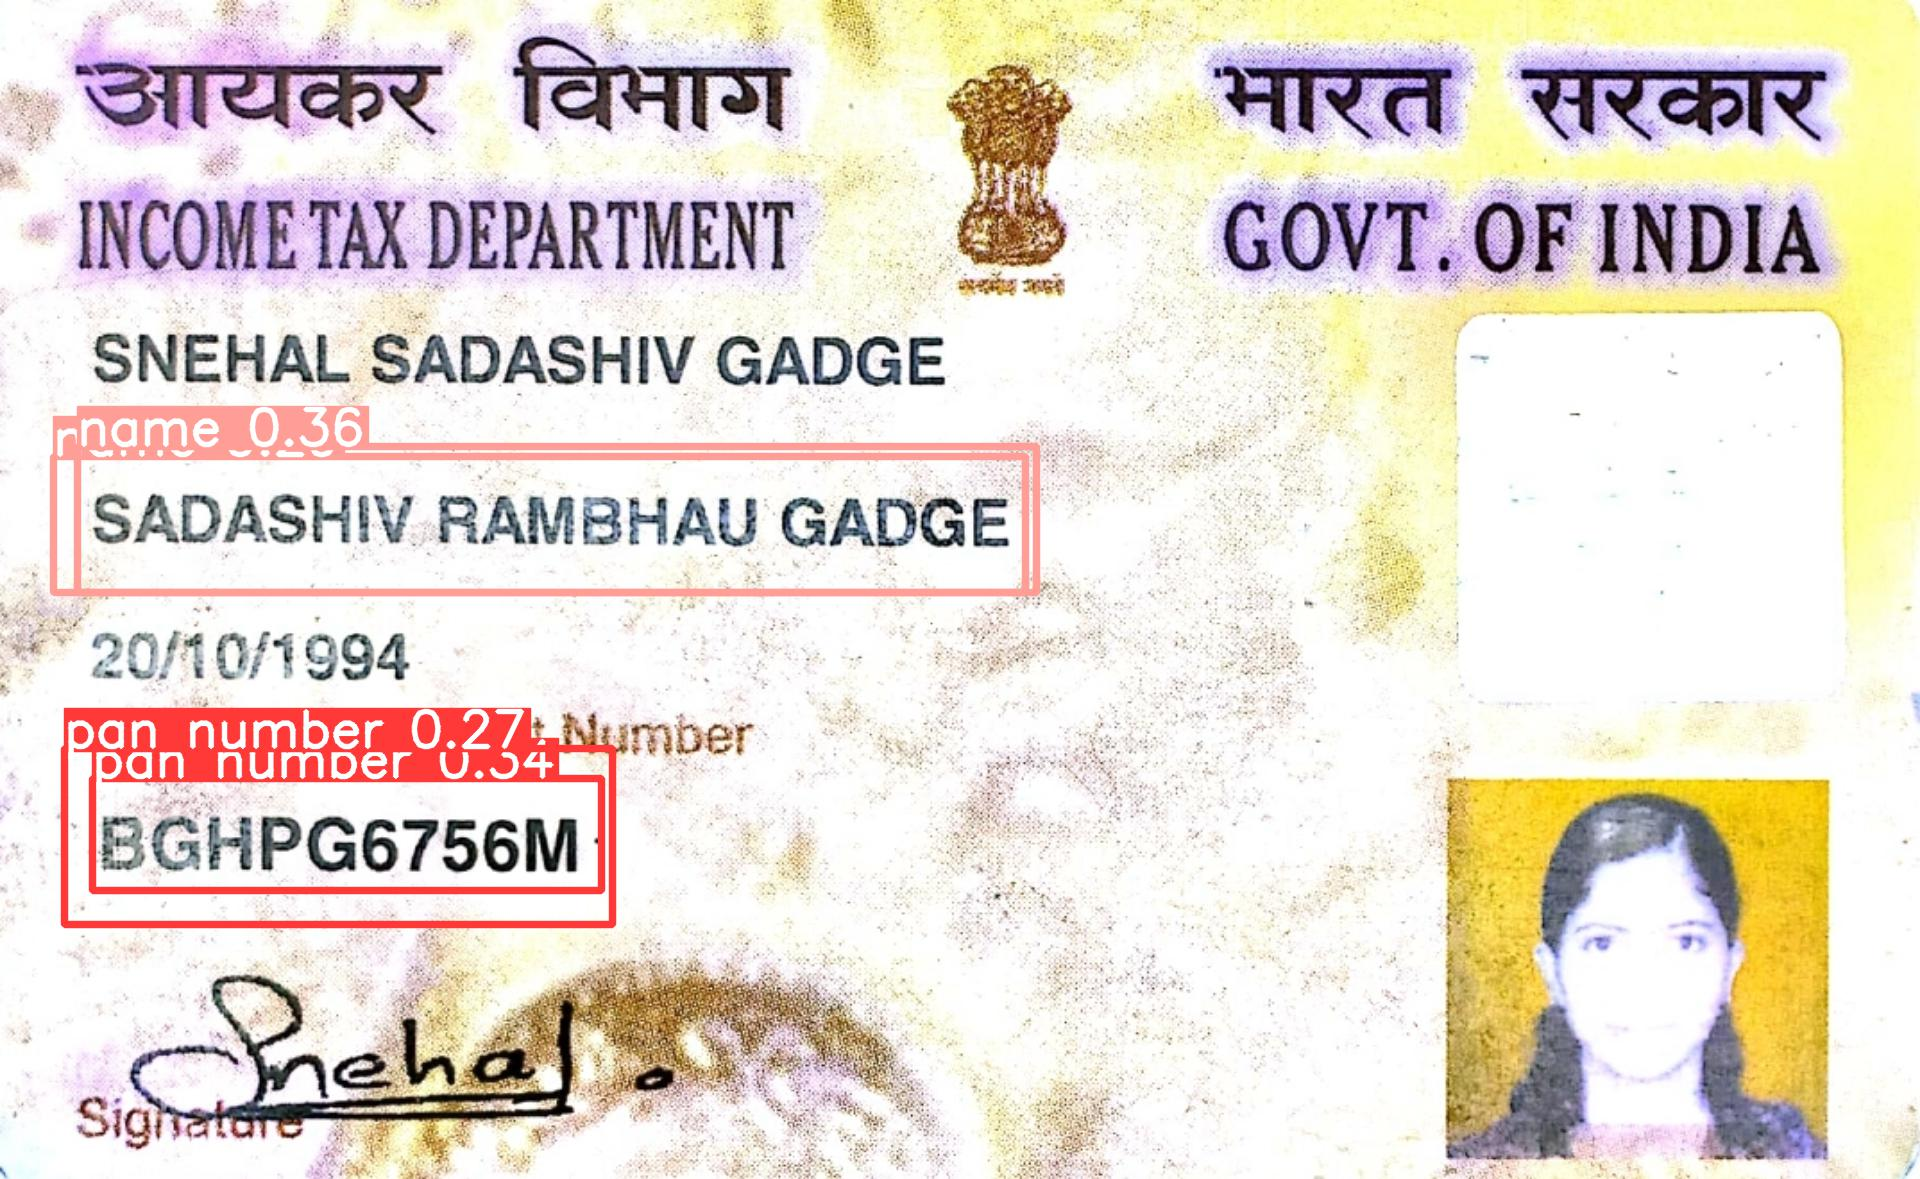

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.imread('/content/runs/detect/exp/image0.jpg'))

In [ ]:
imagep = '/content/index.jpeg'
results = model(image, 500)
results.save()


Saved 1 image to runs/detect/exp2


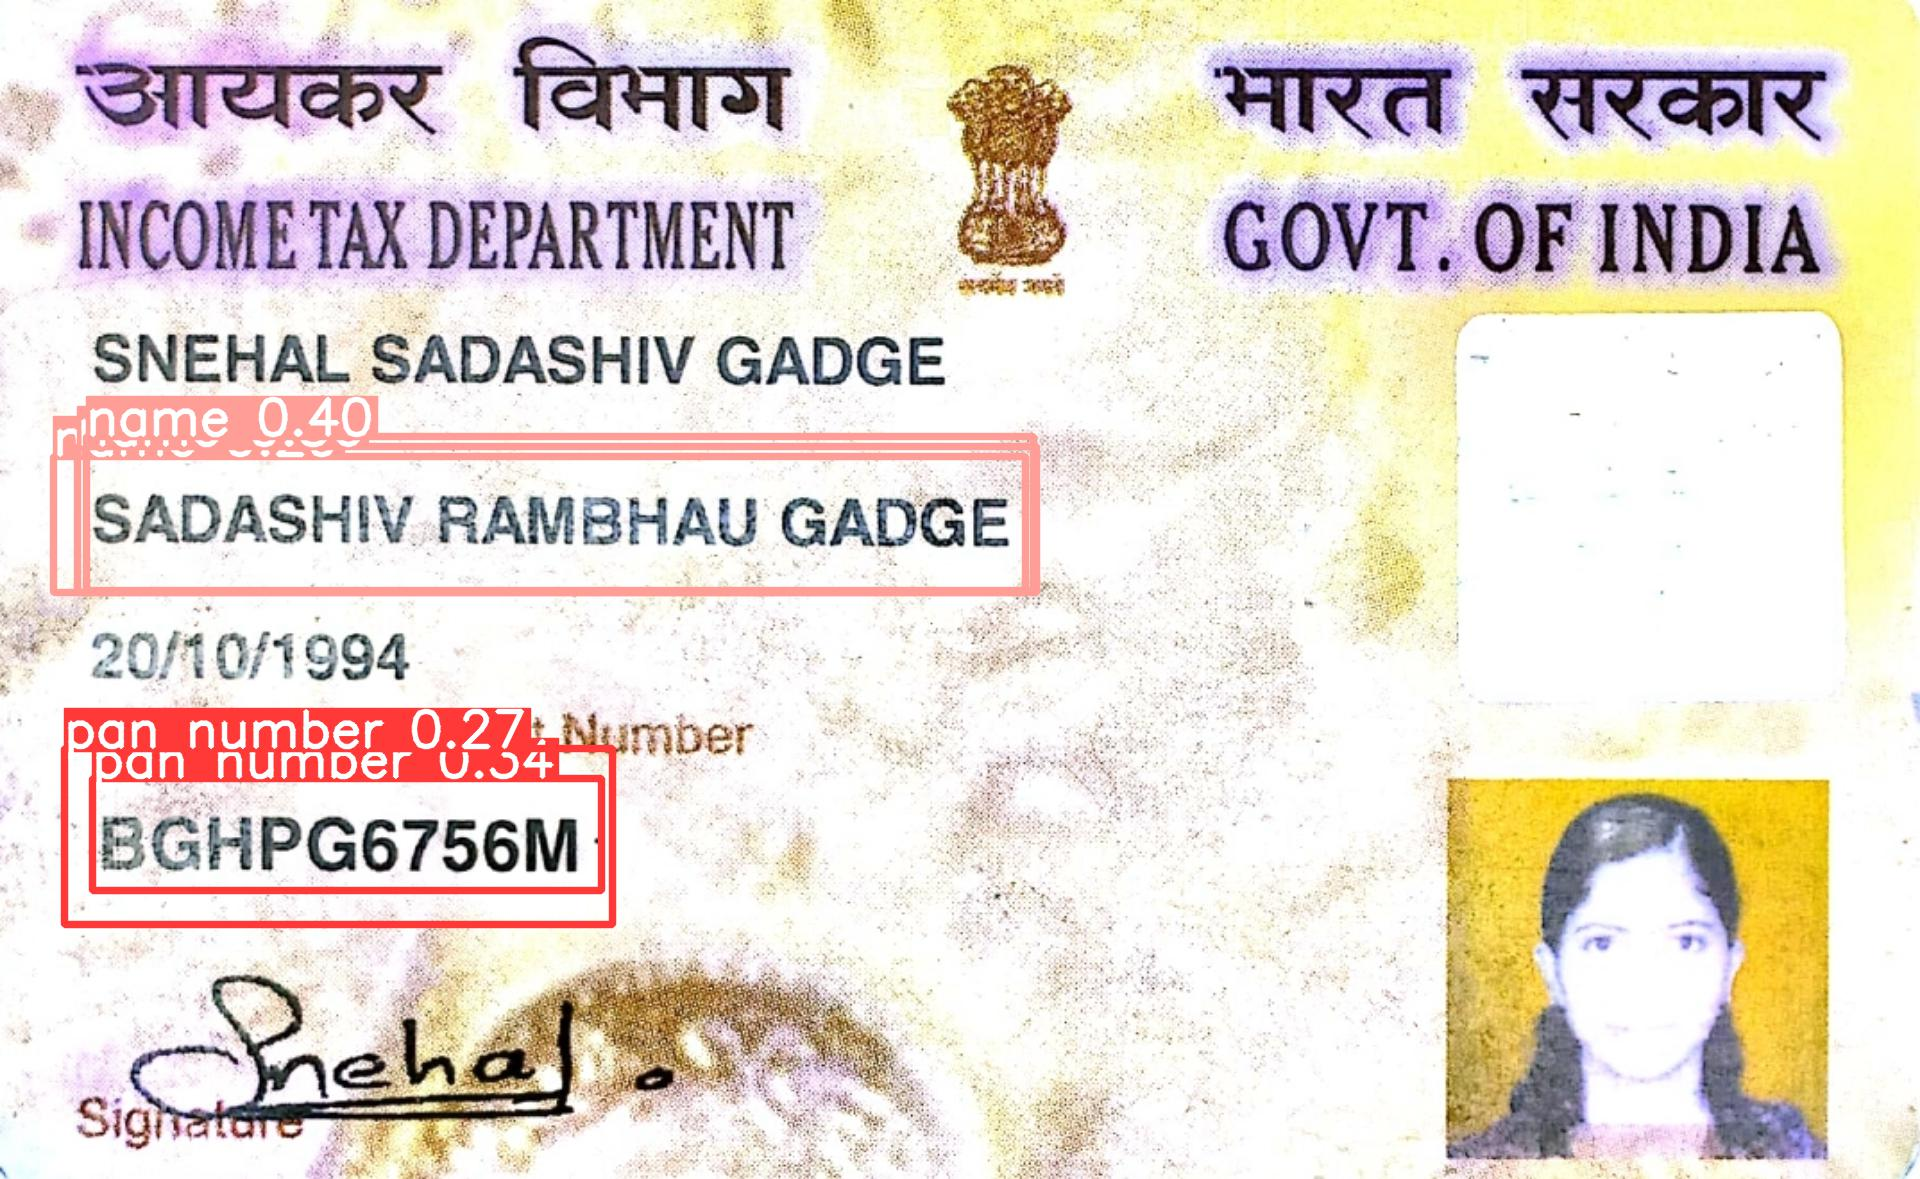

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.imread('/content/runs/detect/exp2/image0.jpg'))